In [137]:
import numpy as np
import matplotlib.pylab as plt 
import imageio.v3 as iio
import networkx as nx
from itertools import count


def graph_atributo(G,atributo,label=False):
    plt.figure(dpi=400)
    groups = set(nx.get_node_attributes(G,atributo).values())
    mapping = dict(zip(sorted(groups),count()))
    nodes = G.nodes()
    colors = [mapping[G.nodes[n][atributo]] for n in nodes]

    # drawing nodes and edges separately so we can capture collection for colobar
    pos = nx.spring_layout(G,iterations=400)
    ec = nx.draw_networkx_edges(G, pos, alpha=0.2)
    lc = nx.draw_networkx_labels(G, pos,font_size=8)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=colors, node_size=100, cmap=plt.cm.jet)
    
    plt.colorbar(nc)
    plt.axis('off')
    plt.show()

def matriz_nn(n):
    nn=n*n
    M=np.zeros((nn,nn),dtype=int)
    
    for i in range(nn):
        for j in range(nn):
            if i+n==j or i-n==j:
                M[i,j]=1


            if i+1==j or i-1==j:
                M[i,j]=1

            if i==j:
                # print(M[i,j])
                if i!=nn-1:
                    
                    if  i%n==0 and i!=0:
                        M[i-1,j]=0
                        M[i,j-1]=0

    return M
def sort_dict_value(dic):    
    return sorted(dic.items(), key=lambda x:x[1])

im = iio.imread('./Environment/mapa_v6.png')
mapa=np.array(im)

(4, 4)


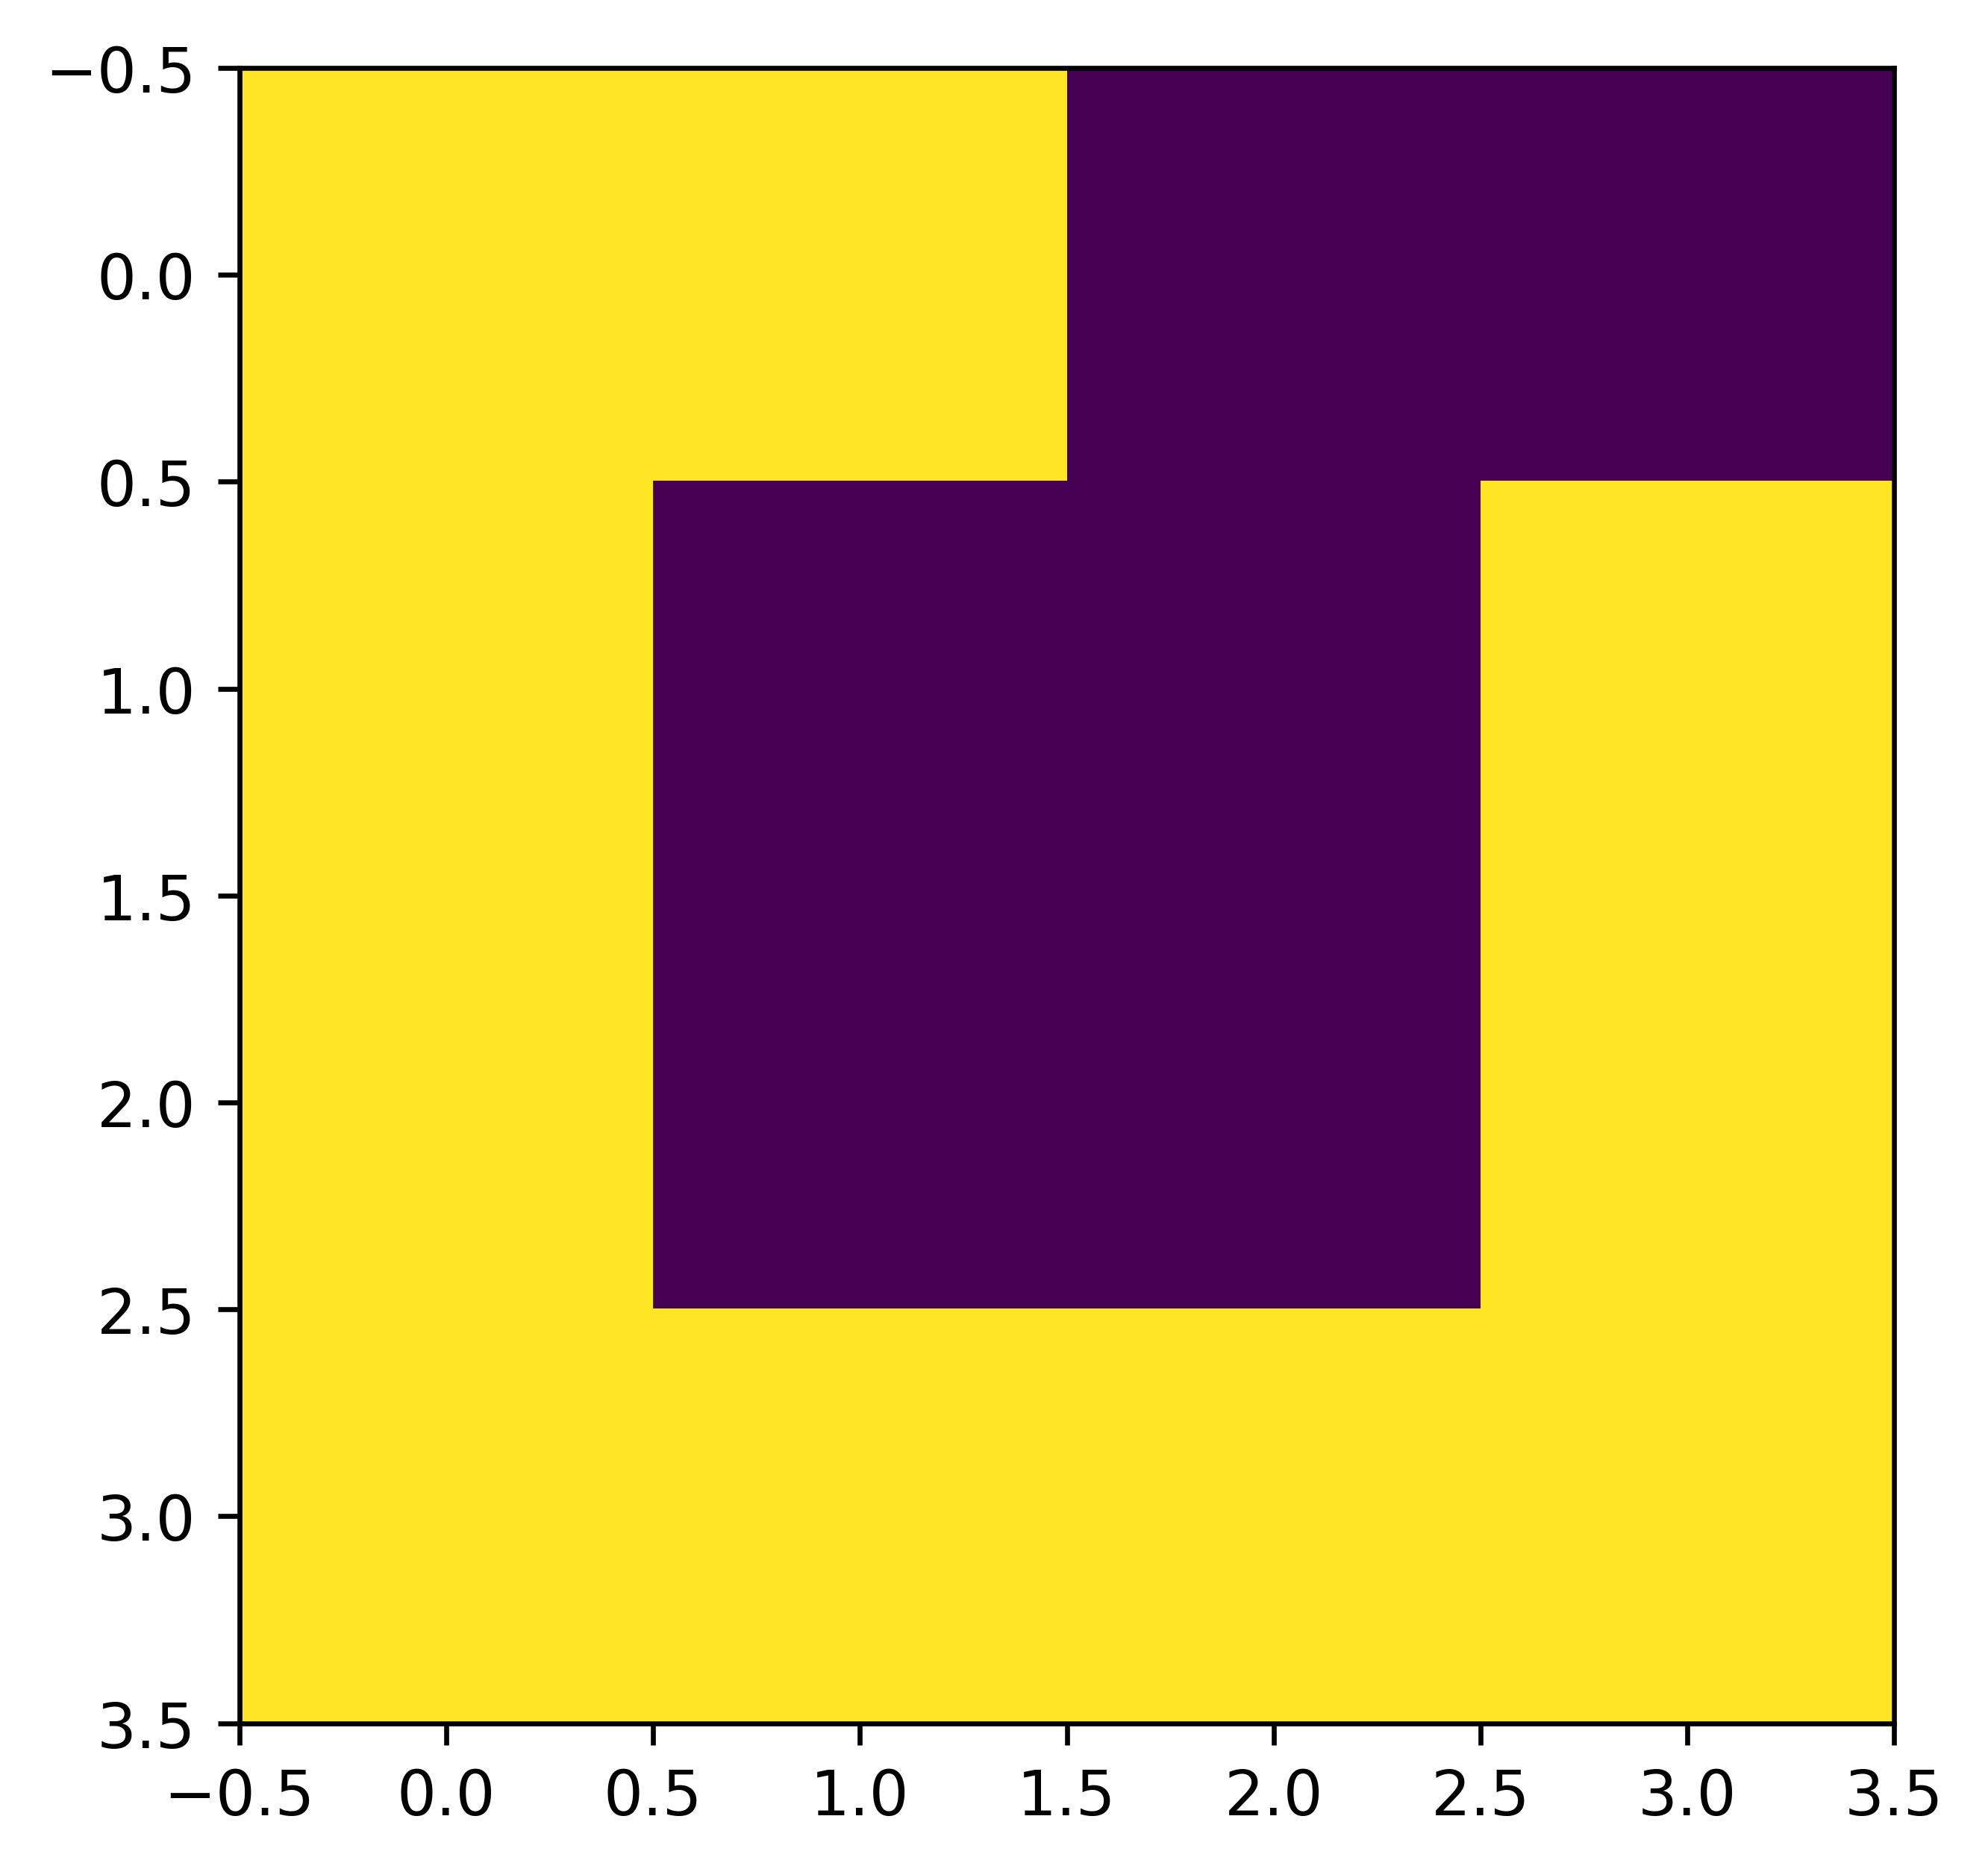

In [138]:
mapa_b=mapa>250
mapa_c=mapa_b[:, :, 0]*1
np.savetxt("./Environment/Aceso.csv", mapa_c, delimiter=",",fmt='%0d')
print(mapa_c.shape)
plt.figure(dpi=600)
plt.imshow(mapa_c.T)

(4, 4)


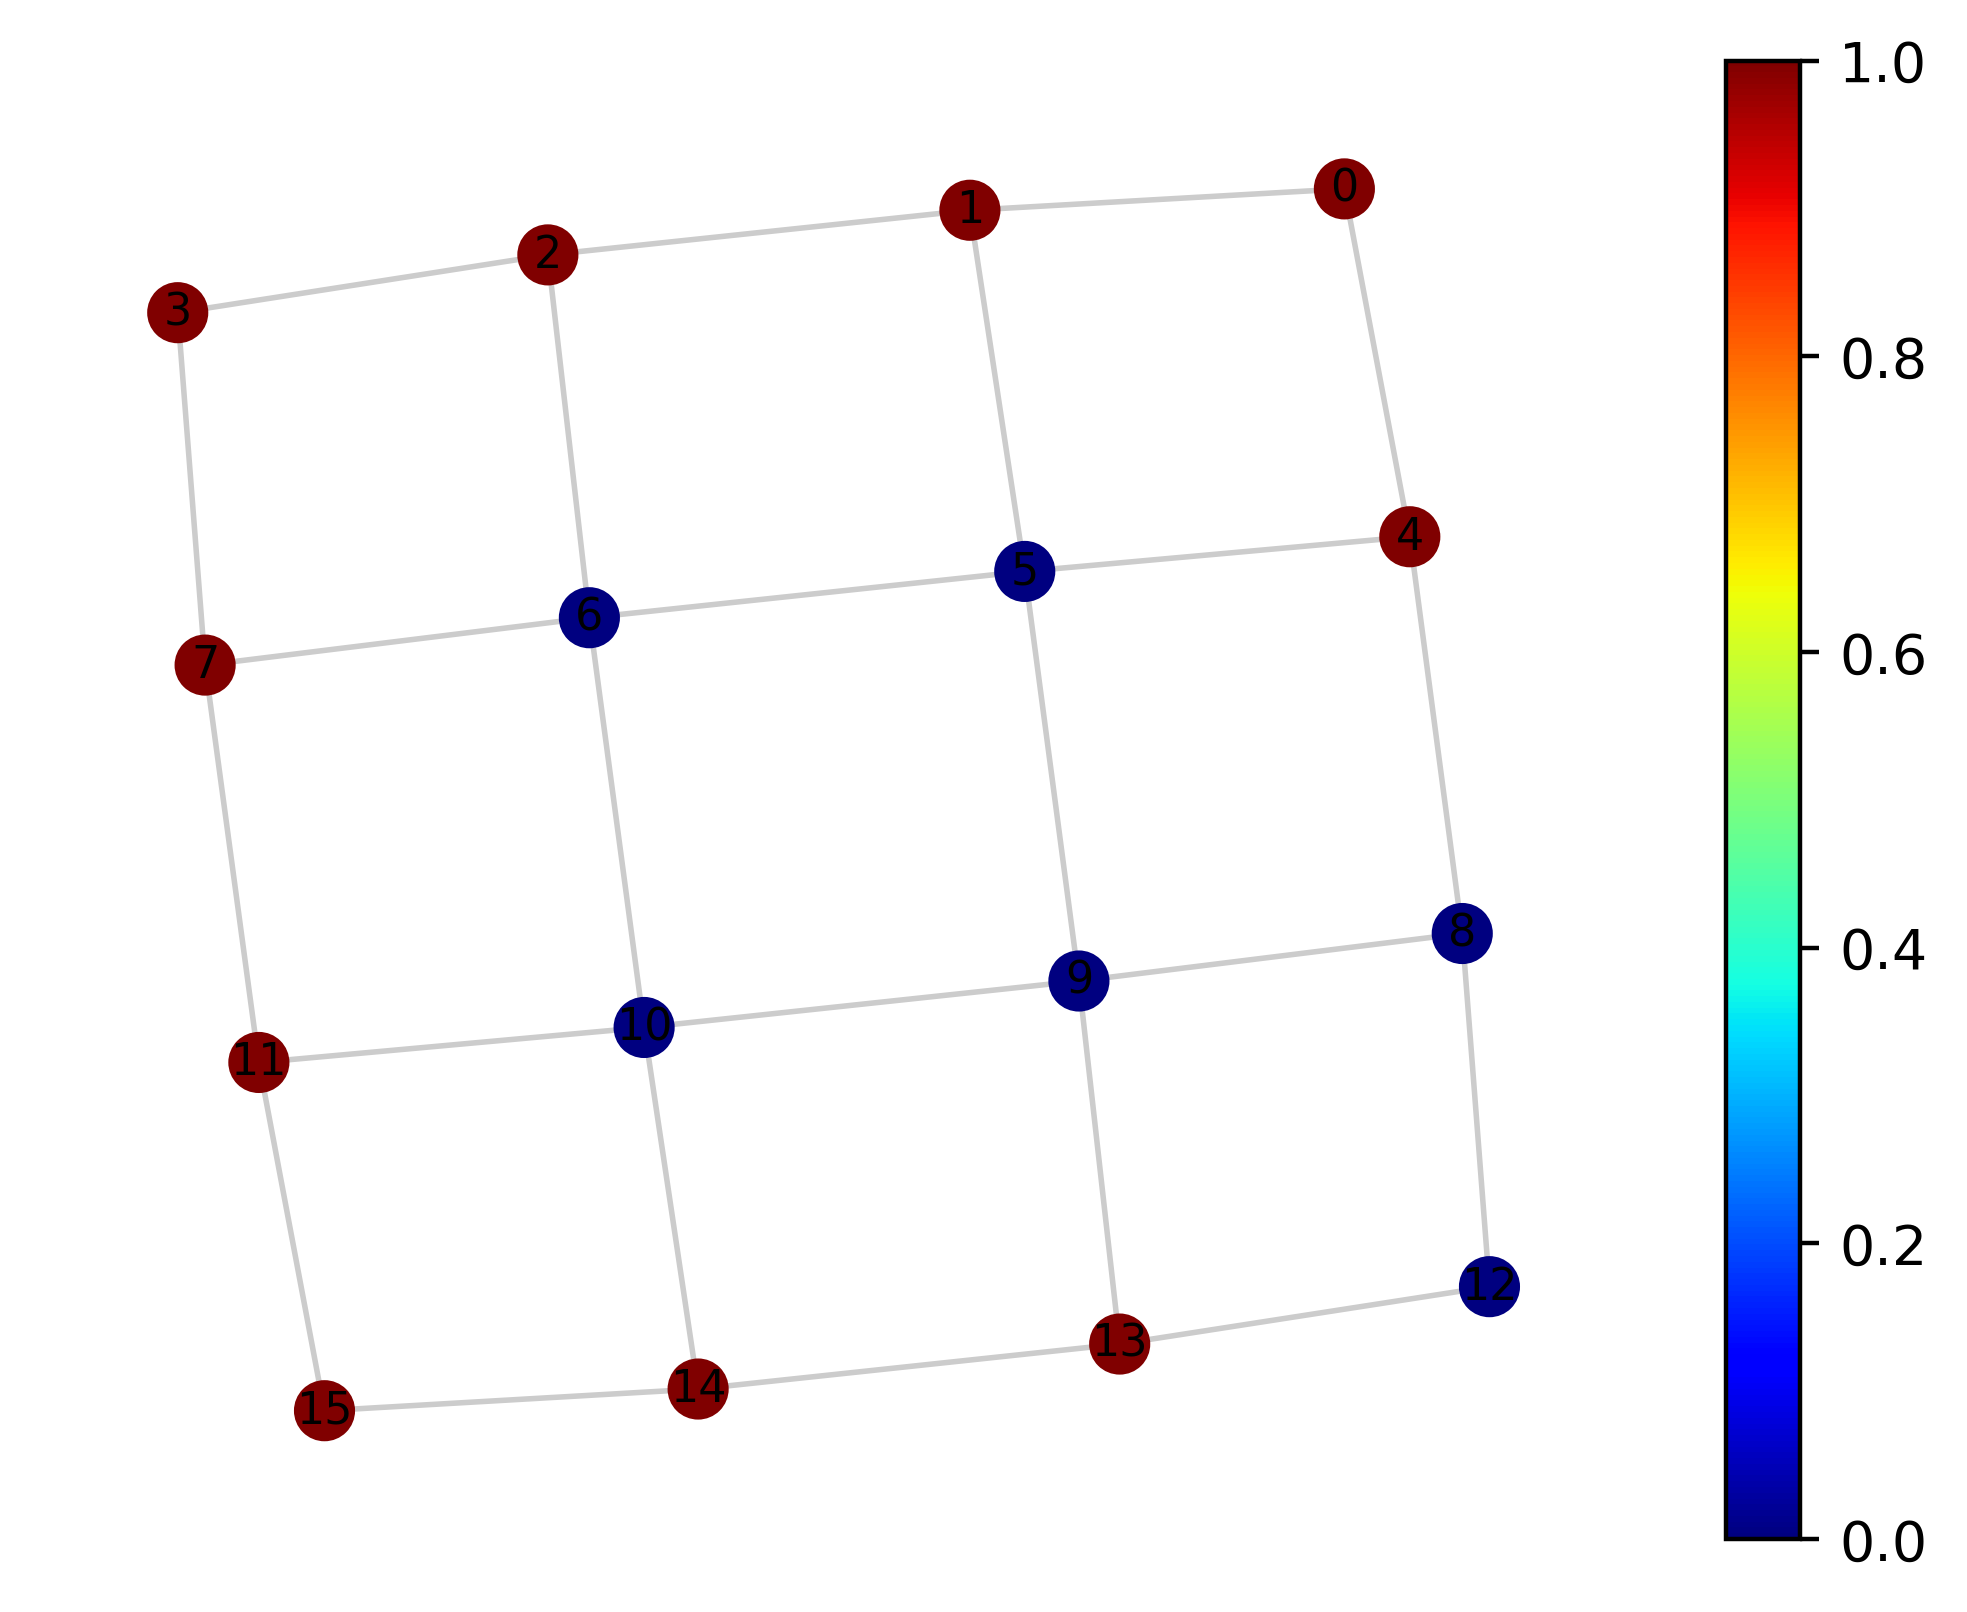

In [133]:
G=nx.Graph()
n=mapa_c.shape[0]
nx.set_node_attributes(G, 0, "Aceso")
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):
        k=str(i*n+j)
        G.add_node(k)
        G.nodes[k]["Aceso"]=mapa_c[i,j]

print(mapa_c.shape)
for i in range(mapa_c.shape[0]):
    for j in range(mapa_c.shape[1]):

            k=str(i*n+j)
            kd=str((i+1)*n+j)
            kb=str(i*n+(j+1))
            
            if i+1==mapa_c.shape[0]:
                if j+1<mapa_c.shape[1]:
                    G.add_edge(k,kb)
            elif j+1==mapa_c.shape[1]:
                
                G.add_edge(k,kd)

            else :

                G.add_edge(k,kd)
                G.add_edge(k,kb)

graph_atributo(G,"Aceso")

In [135]:

A = nx.to_numpy_array(G)
Ac=sort_dict_value(nx.get_node_attributes(G,"Aceso"))
for node_p in Ac:
    if node_p[1]==0:
        node=node_p[0]
        G.remove_node(node)
print(Ac)

#print(A)
plt.show()
M=matriz_nn(4)
np.savetxt("R.csv", A, delimiter=",",fmt='%0d')

[('0', 1), ('1', 1), ('2', 1), ('3', 1), ('4', 1), ('7', 1), ('11', 1), ('13', 1), ('14', 1), ('15', 1)]


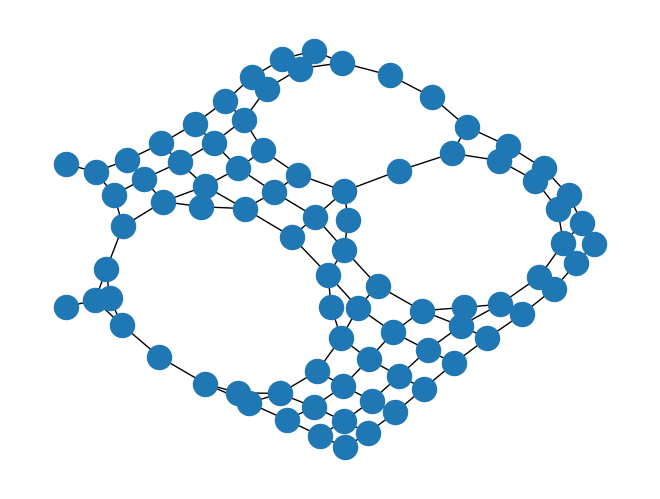

In [90]:
r=np.loadtxt('./R.csv',dtype="int",delimiter=',')
R = nx.from_numpy_array(r)
pos_r=nx.spring_layout(R,iterations=1000)
nx.draw(R,pos=pos_r)

In [117]:
nx.is_isomorphic(G, R)

False

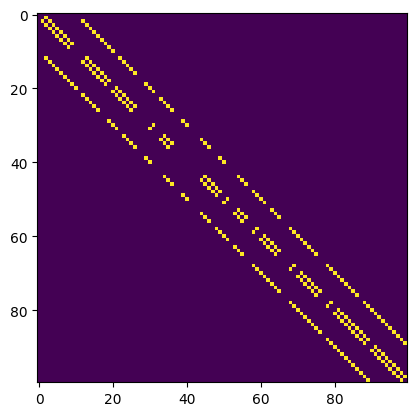

In [96]:
r1=np.loadtxt('./R.csv',dtype="int",delimiter=',')
r2=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')

plt.imshow(r2)

[]
[1, 2, 12, 22, 21, 31]


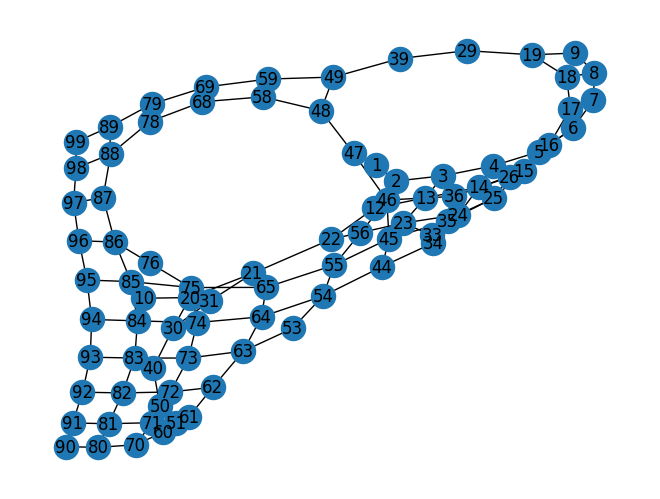

In [118]:
r=np.loadtxt('./Environment/Matriz_adyacencia_mapa.csv',dtype="int",delimiter=',')
R = nx.from_numpy_array(r)
R.remove_nodes_from(list(nx.isolates(R)))
print(list(nx.isolates(R)))
pos_r=nx.spring_layout(R,iterations=1000)
print(nx.dijkstra_path(R, 1, 31))
nx.draw(R,pos=pos_r,with_labels=True)

In [120]:
nx.is_isomorphic(G, R)

True